In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
robot_data = pd.read_csv("Final_robot_data.csv")
robot_data = robot_data.query('Task_name != "CustomReachEnv0"')
robot_data = robot_data.drop('Unnamed: 0', axis=1)

In [ ]:
robot_data = robot_data.query('Participant_id <= 30').copy()

In [ ]:
robot_data = robot_data.drop(['Participant_id', 'Game_name', 'Timestamp', 'Human_feedback', 'Starting_position'], axis=1)
robot_data = robot_data.loc[~robot_data.State.str.contains('invalid'), :]

In [ ]:
task1 = robot_data.query('Task_name == "CustomReachEnv1"').copy()

In [ ]:
robot_data[['State_x', 'State_y', 'State_z']] = [[int(s[0]), int(s[1]), int(s[2])] for s in robot_data['State'].str.split(',')]
robot_data = robot_data.drop('State', axis=1)

In [ ]:
robot_data['Task_name'] = robot_data.Task_name.map({"CustomReachEnv1": 1, "CustomReachEnv2": 2, "CustomReachEnv3": 3})

In [ ]:
X_train = robot_data.query('Game_num < 4').copy()
X_test = robot_data.query('Game_num >= 4').copy()

In [ ]:
Y_train = X_train['Type_of_intervention'].copy().map({"None": 0, "demonstration": 1, "feedback": 1})
# Y_train = Y_train.reset_index()
X_train = X_train.drop(['Type_of_intervention'], axis=1)

Y_test = X_test['Type_of_intervention'].copy().map({"None": 0, "demonstration": 1, "feedback": 1})
# Y_test = Y_test.reset_index()
X_test = X_test.drop(['Type_of_intervention'], axis=1)

In [ ]:
Y_train.reset_index().query('Type_of_intervention == "feedback"')

,index,Type_of_intervention
292,292,feedback
293,293,feedback
294,294,feedback
295,295,feedback
296,296,feedback
...,...,...
94787,101255,feedback
94788,101256,feedback
94789,101257,feedback
94790,101258,feedback


# Train

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
lg = DecisionTreeClassifier(splitter='best').fit(X_train, Y_train)

In [ ]:
predicted = lg.predict(X_test)

In [ ]:
predicted[0], predicted[224], predicted[6424]

In [ ]:
accuracy_score(Y_test, predicted)

0.7691356115664141

In [ ]:
X_test.groupby('Task_name').Game_num.value_counts()

In [ ]:
Y_test.value_counts()

0    5553
1     914
Name: Type_of_intervention, dtype: int64

In [ ]:
pd.Series(predicted).value_counts()

0    5488
1     979
dtype: int64

<Axes: >

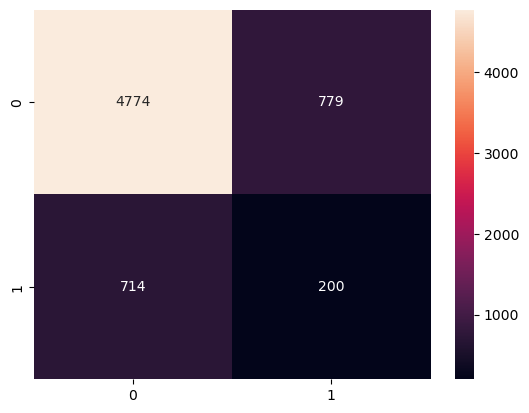

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predicted), annot=True, fmt='g')

In [ ]:
Y_train.value_counts()

In [ ]:
coefs = pd.DataFrame([lg.feature_importances_], columns = X_train.columns)

In [ ]:
coefs.T.sort_values(by=0, key=lambda x: abs(x), ascending=False)

,0
Time_step,0.322653
Task_elapsed_time,0.124381
Advantage,0.113409
"Q(s,a)",0.109748
Game_elapsed_time,0.106707
State_y,0.064839
State_x,0.060402
Task_name,0.033911
Action,0.027244
State_z,0.021326
